In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Heart.csv")

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , recall_score , precision_score, classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV
X=df.drop("output", axis=1)
y=df["output"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train,y_train)
pred= lr.predict(X_test)



C:\Users\cenkg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:

cm=confusion_matrix(pred,y_test)
cr=classification_report(pred,y_test)
print(cm)
print("Accuracy_score : ",accuracy_score(y_test,y_pred1)*100)
print("Recall_score : ",recall_score(y_test,y_pred1))
print("Precision_score : ",precision_score(y_test,y_pred1))
print(cr)

[[25  3]
 [ 4 29]]
Accuracy_score :  88.52459016393442
Recall_score :  0.90625
Precision_score :  0.8787878787878788
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



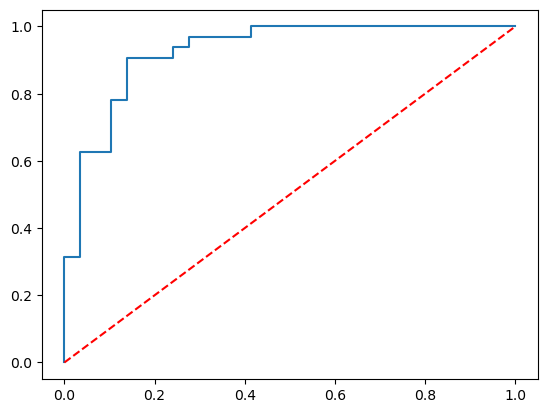

In [22]:
auc=roc_auc_score(y_test,pred)
fpr,tpr,thresold = roc_curve(y_test,lr.predict_proba(X_test)[:,1]) 
plt.plot(fpr,tpr,label="MODEL AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=10)
scores

C:\Users\cenkg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cenkg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.87096774, 0.80645161, 0.83870968, 0.86666667, 0.9       ,
       0.86666667, 0.83333333, 0.86666667, 0.7       , 0.73333333])

In [67]:
scores.mean()

0.8282795698924732